[Back](https://keqideng.github.io/data_analysis_portfolio_project/)
# Ontario Covid-19 Data Analysis
Date Sept 10 2021

Prepared by ***Keqi Deng***

Data Source: [Ontario Open Data](https://data.ontario.ca/en/dataset)

## Note
This analysis used public data provided by Ontario Public Health. The main purpose of this analysis is to find the correlation between different attributes. Analysis methods are not from academical research. The author of this report does not have background in epidemiology. This study is solely for data analysis demonstration purpose only.

## Analysis Goals
* Identify COVID-19 daily new case trend in districts with most COVID-19 cases
* Calculate the change percentage rate for daily COVID-19 cases
* Identify the districts with higher than average increasing rate

## Import Packages

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import requests
import io
from _datetime import datetime
import wordcloud

## Import Data
In order to import the online csv datasets from public data, use the following instant function to simplify the process:

In [4]:
def df_csv(url):
    source = requests.get(url).text
    reader = io.StringIO(source)
    return pd.read_csv(reader)

Then, import [Status of COVID-19 cases in Ontario](https://data.ontario.ca/en/dataset/status-of-covid-19-cases-in-ontario/resource/ed270bb8-340b-41f9-a7c6-e8ef587e6d11) and [Daily change in cases by PHU](https://data.ontario.ca/en/dataset/status-of-covid-19-cases-in-ontario/resource/8a88fe6d-d8fb-41a3-9d04-f0550a44999f) datasets from Ontario Government website:

In [5]:
on_covid_status_df = df_csv('https://data.ontario.ca/dataset/f4f86e54-872d-43f8-8a86-3892fd3cb5e6/resource/ed270bb8-340b-41f9-a7c6-e8ef587e6d11/download/covidtesting.csv')
on_covid_status_df['Reported Date'] = pd.to_datetime(on_covid_status_df['Reported Date'])

print(on_covid_status_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 586 entries, 0 to 585
Data columns (total 27 columns):
 #   Column                                                     Non-Null Count  Dtype         
---  ------                                                     --------------  -----         
 0   Reported Date                                              586 non-null    datetime64[ns]
 1   Confirmed Negative                                         47 non-null     float64       
 2   Presumptive Negative                                       12 non-null     float64       
 3   Presumptive Positive                                       25 non-null     float64       
 4   Confirmed Positive                                         584 non-null    float64       
 5   Resolved                                                   574 non-null    float64       
 6   Deaths                                                     546 non-null    float64       
 7   Total Cases                        

In [6]:
phu_daily_df = df_csv('https://data.ontario.ca/dataset/f4f86e54-872d-43f8-8a86-3892fd3cb5e6/resource/8a88fe6d-d8fb-41a3-9d04-f0550a44999f/download/daily_change_in_cases_by_phu.csv')
phu_daily_df['Date'] = pd.to_datetime(phu_daily_df['Date'])

print(phu_daily_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 539 entries, 0 to 538
Data columns (total 36 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   Date                            539 non-null    datetime64[ns]
 1   Algoma_District                 536 non-null    float64       
 2   Brant_County                    536 non-null    float64       
 3   Chatham_Kent                    536 non-null    float64       
 4   Durham_Region                   536 non-null    float64       
 5   Eastern_Ontario                 536 non-null    float64       
 6   Grey_Bruce                      536 non-null    float64       
 7   Haldimand_Norfolk               536 non-null    float64       
 8   Haliburton_Kawartha_Pine_Ridge  536 non-null    float64       
 9   Halton_Region                   536 non-null    float64       
 10  City_of_Hamilton                536 non-null    float64       
 11  Hastin

## Daily New Case Analysis
Calculate the rolling average of the different health regions:


In [7]:
phu_daily_avg_df = phu_daily_df.rolling(window = 7).mean()
phu_daily_avg_df.drop('Total', axis = 1, inplace = True)
phu_daily_avg_df['Date'] = phu_daily_df.Date
phu_daily_avg_df.dropna(how='any', inplace=True)
print(phu_daily_avg_df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 527 entries, 12 to 538
Data columns (total 35 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   Algoma_District                 527 non-null    float64       
 1   Brant_County                    527 non-null    float64       
 2   Chatham_Kent                    527 non-null    float64       
 3   Durham_Region                   527 non-null    float64       
 4   Eastern_Ontario                 527 non-null    float64       
 5   Grey_Bruce                      527 non-null    float64       
 6   Haldimand_Norfolk               527 non-null    float64       
 7   Haliburton_Kawartha_Pine_Ridge  527 non-null    float64       
 8   Halton_Region                   527 non-null    float64       
 9   City_of_Hamilton                527 non-null    float64       
 10  Hastings_Prince_Edward          527 non-null    float64       
 11  Huron

Plot the result

<AxesSubplot:>

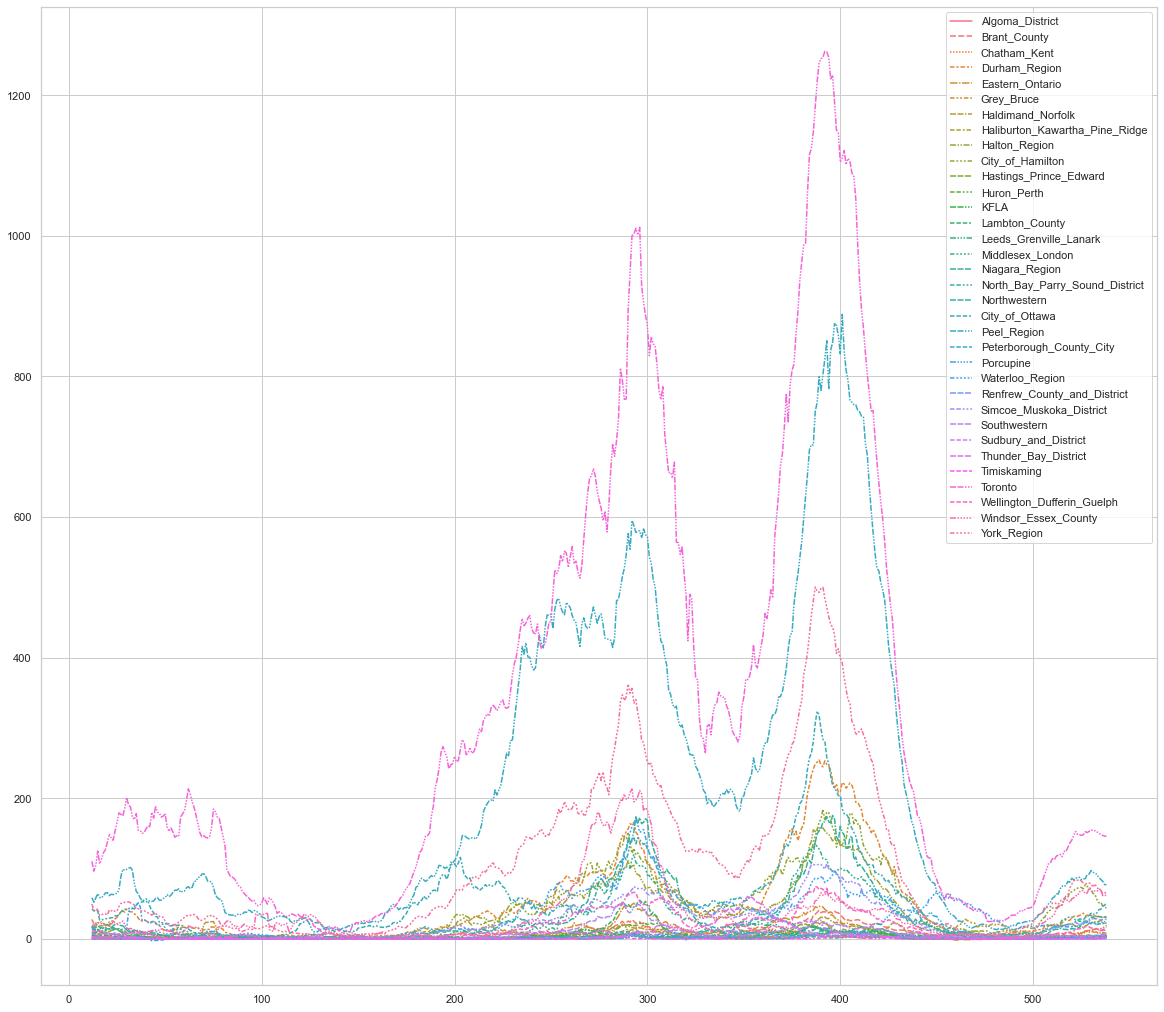

In [8]:
plt.figure(figsize=(20,18))
sns.set_theme(style="whitegrid", palette="colorblind")
sns.lineplot(data = phu_daily_avg_df)

We realize that it is hard to show the trend for specific regions.

In order to do that, we would like to focus on top 4 regions with top average daily cases:

In [9]:
phu_daily_df.mean().sort_values(ascending=False)

/var/folders/df/l_7_3v3s13b0w6_jwtd7kkrh0000gn/T/ipykernel_57890/3503816743.py:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  phu_daily_df.mean().sort_values(ascending=False)


Total                             1066.573284
Toronto                            319.565299
Peel_Region                        210.878731
York_Region                        103.483209
City_of_Ottawa                      53.923507
Durham_Region                       49.458955
City_of_Hamilton                    44.345149
Waterloo_Region                     35.873134
Windsor_Essex_County                35.496269
Halton_Region                       34.343284
Niagara_Region                      31.912313
Middlesex_London                    25.399254
Simcoe_Muskoka_District             24.779851
Wellington_Dufferin_Guelph          16.365672
Eastern_Ontario                      9.078358
Brant_County                         7.934701
Southwestern                         7.748134
Lambton_County                       6.945896
Thunder_Bay_District                 6.320896
Haldimand_Norfolk                    5.274254
Haliburton_Kawartha_Pine_Ridge       4.410448
Sudbury_and_District              

The regions with top 4 daily COVID-19 cases are Toronto, Peel, York and Ottawa.

First we stack the data from different regions for graphing:

In [10]:
phu_top_four_df = phu_daily_avg_df[['Date','Toronto','Peel_Region','York_Region','City_of_Ottawa']]
phu_top_four_df.set_index('Date', inplace=True)
phu_top_four_stack_df = pd.DataFrame(phu_top_four_df.stack().reset_index())
phu_top_four_stack_df.rename(columns={'level_1':'PHU',0:'7day_avg_infc'}, inplace=True)
print(phu_top_four_stack_df.head(5))

        Date             PHU  7day_avg_infc
0 2020-04-05         Toronto     110.428571
1 2020-04-05     Peel_Region      58.571429
2 2020-04-05     York_Region      49.714286
3 2020-04-05  City_of_Ottawa      43.000000
4 2020-04-06         Toronto      96.285714


Then use ```Seaborn``` for graphing:


<AxesSubplot:xlabel='Date', ylabel='7day_avg_infc'>

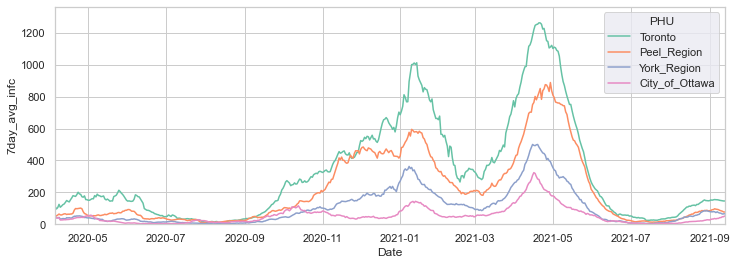

In [11]:
fig = plt.figure(figsize=(12,4))
plt.xlim(phu_top_four_stack_df.Date.min(),phu_top_four_stack_df.Date.max())
plt.ylim(0,phu_top_four_stack_df['7day_avg_infc'].max()+100)
sns.set_theme(style='darkgrid', palette='Set2')
sns.lineplot(data=phu_top_four_stack_df, x = 'Date', y = '7day_avg_infc', hue='PHU')

Separate to 4 small plots:

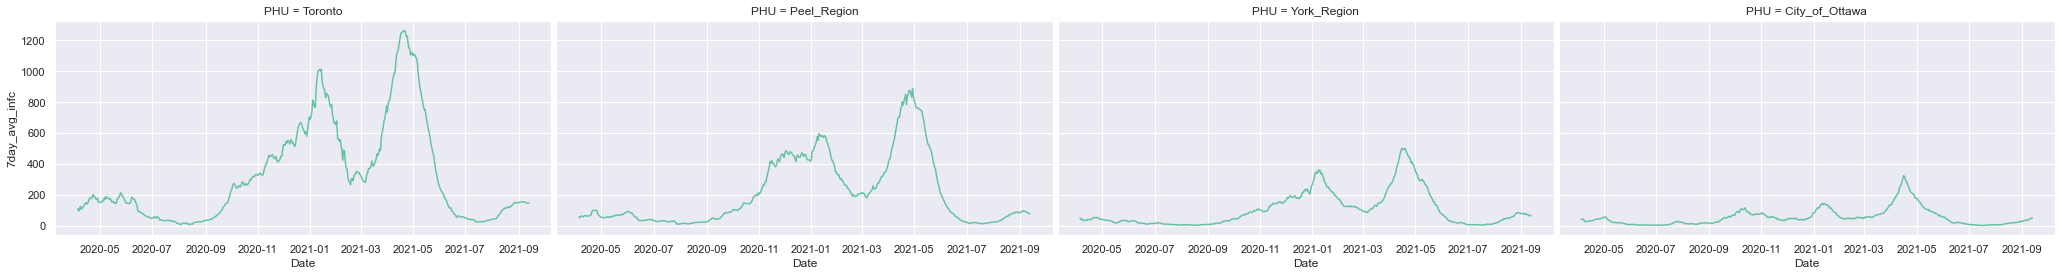

In [12]:
sns.set_theme(style='darkgrid', palette='Set2')
fig = sns.FacetGrid(data=phu_top_four_stack_df, col='PHU', margin_titles=True, despine=False, height=4, aspect=1.8)
fig.map(sns.lineplot, 'Date', '7day_avg_infc')
fig.figure.subplots_adjust(wspace=0.01)

Calculate the daily change rate of four different health regions:

In [13]:
phu_top_four_pct_df = phu_top_four_df.pct_change().dropna()
phu_four_reg_pct_stack = pd.DataFrame(phu_top_four_pct_df.stack()).reset_index()
phu_four_reg_pct_stack.rename(columns={'level_1':'PHU',0:'avg_inf'}, inplace=True)
print(phu_four_reg_pct_stack.head(5))

        Date             PHU   avg_inf
0 2020-04-06         Toronto -0.128072
1 2020-04-06     Peel_Region -0.109756
2 2020-04-06     York_Region -0.186782
3 2020-04-06  City_of_Ottawa -0.076412
4 2020-04-07         Toronto  0.089021


Use the same method to plot in order to compare trend:

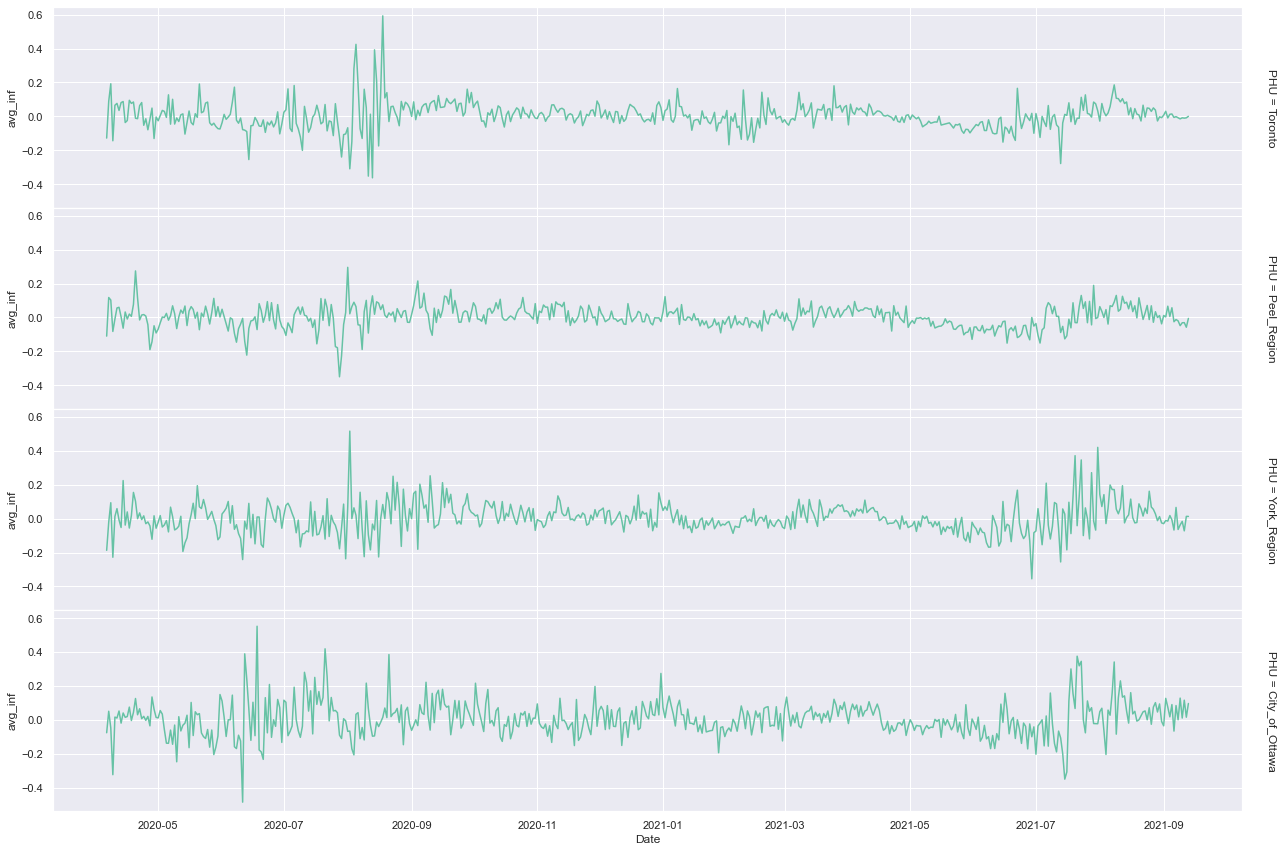

In [14]:
sns.set_theme(style='darkgrid', palette='Set2')
fig = sns.FacetGrid(data=phu_four_reg_pct_stack, row='PHU', margin_titles=True, despine=False, height=3, aspect=6)
fig.map(sns.lineplot, 'Date', 'avg_inf')
fig.figure.subplots_adjust(hspace=0)

For the past 30 days:

<AxesSubplot:xlabel='Date', ylabel='avg_inf'>

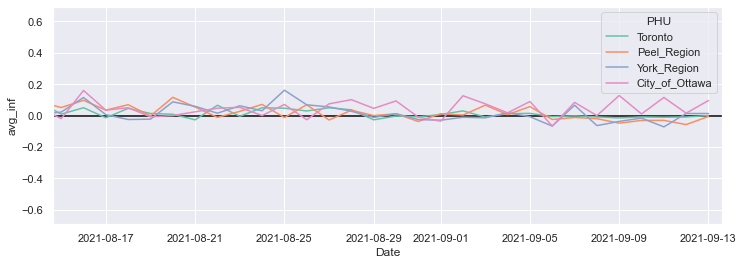

In [15]:
fig = plt.figure(figsize=(12,4))
plt.xlim(np.datetime64(datetime.today()) - np.timedelta64(30, 'D'),np.datetime64(datetime.today()))
plt.ylim(-phu_four_reg_pct_stack.avg_inf.max()-0.1,phu_four_reg_pct_stack.avg_inf.max()+0.1)
sns.set_theme(style='darkgrid', palette='Set2')
plt.axhline(y=0, color='black')
sns.lineplot(data=phu_four_reg_pct_stack, x = 'Date', y = 'avg_inf', hue='PHU')

<AxesSubplot:xlabel='Date', ylabel='7day_avg_infc'>

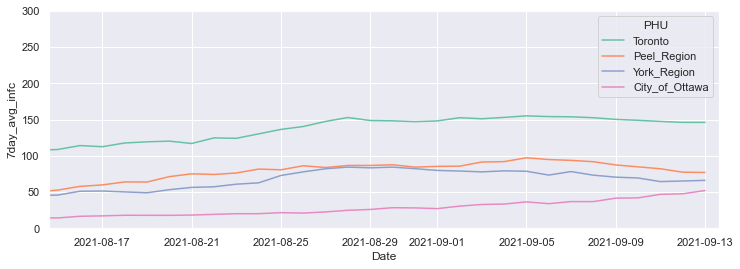

In [16]:
fig = plt.figure(figsize=(12,4))
plt.xlim(np.datetime64(datetime.today()) - np.timedelta64(30, 'D'),np.datetime64(datetime.today()))
plt.ylim(0,300)
sns.set_theme(style='darkgrid', palette='Set2')
sns.lineplot(data=phu_top_four_stack_df, x = 'Date', y = '7day_avg_infc', hue='PHU')

We can see that as the infection cases go up in Ontario, the daily new infected patient in Toronto, Peel and York Region are not significantly increased at lease for the past two weeks. Use the following methods to find out which region have the highest increase rate:

In [17]:
phu_pct_df = phu_daily_df.iloc[:,1:].pct_change()
phu_pct_df['Date'] = phu_daily_df.Date

#Calculate the region with highest increasing rate for the past week:
phu_pct_df[phu_pct_df.Date > np.datetime64(datetime.today()) - np.timedelta64(7, 'D')].sum().sort_values(ascending=False)

/var/folders/df/l_7_3v3s13b0w6_jwtd7kkrh0000gn/T/ipykernel_57890/1285918203.py:5: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  phu_pct_df[phu_pct_df.Date > np.datetime64(datetime.today()) - np.timedelta64(7, 'D')].sum().sort_values(ascending=False)


Algoma_District                         inf
Thunder_Bay_District                    inf
Northwestern                            inf
Renfrew_County_and_District             inf
Leeds_Grenville_Lanark                  inf
Lambton_County                          inf
Hastings_Prince_Edward                  inf
Haldimand_Norfolk                       inf
Grey_Bruce                              inf
Porcupine                               inf
Huron_Perth                        9.442857
Eastern_Ontario                    6.613690
KFLA                               3.857143
Brant_County                       3.701115
Wellington_Dufferin_Guelph         3.392491
Peterborough_County_City           2.461905
Waterloo_Region                    2.332417
City_of_Ottawa                     2.059150
Sudbury_and_District               1.934524
Haliburton_Kawartha_Pine_Ridge     1.898810
Durham_Region                      1.120008
North_Bay_Parry_Sound_District     1.038095
Chatham_Kent                    

In order to make sense of the infinite value, make a pseudo dataset where we replace 0 to 0.1, then rank the infection case increasing rate for the past week:

In [18]:
pseudo_phu_df = phu_daily_df.replace(0,0.8)

#Percentage Change:
pseudo_phu_pct_df = pseudo_phu_df.iloc[:,1:].pct_change()
pseudo_phu_pct_df['Date'] = pseudo_phu_df.Date

#Region increasing rate ranking for the past 7 days:
phu_change_rate = pseudo_phu_pct_df[pseudo_phu_pct_df.Date > np.datetime64(datetime.today())-np.timedelta64(7,'D')].sum().sort_values(ascending=False)
phu_change_rate

/var/folders/df/l_7_3v3s13b0w6_jwtd7kkrh0000gn/T/ipykernel_57890/3641534642.py:8: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  phu_change_rate = pseudo_phu_pct_df[pseudo_phu_pct_df.Date > np.datetime64(datetime.today())-np.timedelta64(7,'D')].sum().sort_values(ascending=False)


Lambton_County                    10.316667
Huron_Perth                        9.442857
Algoma_District                    8.425000
Renfrew_County_and_District        7.714286
Eastern_Ontario                    6.613690
Haldimand_Norfolk                  5.488889
Thunder_Bay_District               4.700000
Grey_Bruce                         4.583333
Hastings_Prince_Edward             4.425000
Leeds_Grenville_Lanark             3.900000
KFLA                               3.857143
Northwestern                       3.750000
Brant_County                       3.701115
Wellington_Dufferin_Guelph         3.392491
Peterborough_County_City           2.461905
Waterloo_Region                    2.332417
City_of_Ottawa                     2.059150
Sudbury_and_District               1.934524
Haliburton_Kawartha_Pine_Ridge     1.898810
Durham_Region                      1.120008
North_Bay_Parry_Sound_District     1.038095
Chatham_Kent                       0.759253
Porcupine                       

Using ```wordcloud``` to  see which public health district has the highest COVID-19 daily new case increasing rate:

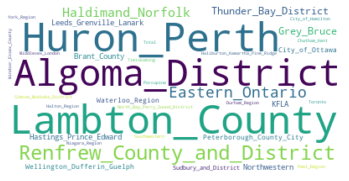

In [47]:
phu_change_rate_df = pd.DataFrame(phu_change_rate)
phu_change_rate_df.columns = ['change_rate']

text = ' '.join(phu for phu in phu_change_rate_df.index)
wc = wordcloud.WordCloud(background_color='white').generate(text=text)
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

In [20]:
'''
Here we can get a list of health regions
that with daily case count increasing rate
higher than provincial average:
'''
abov_avg_phu = phu_change_rate[phu_change_rate.values>phu_change_rate['Total']]
phu_list = np.array(abov_avg_phu.index)
phu_list


array(['Lambton_County', 'Huron_Perth', 'Algoma_District',
       'Renfrew_County_and_District', 'Eastern_Ontario',
       'Haldimand_Norfolk', 'Thunder_Bay_District', 'Grey_Bruce',
       'Hastings_Prince_Edward', 'Leeds_Grenville_Lanark', 'KFLA',
       'Northwestern', 'Brant_County', 'Wellington_Dufferin_Guelph',
       'Peterborough_County_City', 'Waterloo_Region', 'City_of_Ottawa',
       'Sudbury_and_District', 'Haliburton_Kawartha_Pine_Ridge',
       'Durham_Region', 'North_Bay_Parry_Sound_District', 'Chatham_Kent',
       'Porcupine', 'City_of_Hamilton', 'Halton_Region', 'Niagara_Region',
       'Peel_Region', 'York_Region', 'Windsor_Essex_County',
       'Simcoe_Muskoka_District'], dtype=object)

## Vaccination Data Analysis
Data from Ontario OpenData [COVID-19 Vaccine data by Public Health Unit](https://data.ontario.ca/dataset/covid-19-vaccine-data-in-ontario/resource/2a362139-b782-43b1-b3cb-078a2ef19524), updated daily.

In [57]:
#Data from Ontario OpenData, updated daily
on_vaxx_df = df_csv('https://data.ontario.ca/dataset/752ce2b7-c15a-4965-a3dc-397bf405e7cc/resource/2a362139-b782-43b1-b3cb-078a2ef19524/download/vaccines_by_age_phu.csv')
on_vaxx_df['Date'] = pd.to_datetime(on_vaxx_df.Date)
on_vaxx_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19239 entries, 0 to 19238
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   Date                          19239 non-null  datetime64[ns]
 1   PHU ID                        19239 non-null  int64         
 2   PHU name                      19239 non-null  object        
 3   Agegroup                      19239 non-null  object        
 4   At least one dose_cumulative  19239 non-null  int64         
 5   Second_dose_cumulative        18925 non-null  float64       
 6   Total population              19239 non-null  int64         
 7   Percent_at_least_one_dose     17000 non-null  float64       
 8   Percent_fully_vaccinated      17000 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(3), object(2)
memory usage: 1.3+ MB


In [58]:
on_vaxx_df.Date

0       2021-07-26
1       2021-07-26
2       2021-07-26
3       2021-07-26
4       2021-07-26
           ...    
19234   2021-09-13
19235   2021-09-13
19236   2021-09-13
19237   2021-09-13
19238   2021-09-13
Name: Date, Length: 19239, dtype: datetime64[ns]

In [79]:
#Find the most recent data:

on_vaxx_rn_df = on_vaxx_df[on_vaxx_df.Date == np.datetime64(datetime.today().date())]
on_vaxx_rn_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 385 entries, 18854 to 19238
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   Date                          385 non-null    datetime64[ns]
 1   PHU ID                        385 non-null    int64         
 2   PHU name                      385 non-null    object        
 3   Agegroup                      385 non-null    object        
 4   At least one dose_cumulative  385 non-null    int64         
 5   Second_dose_cumulative        378 non-null    float64       
 6   Total population              385 non-null    int64         
 7   Percent_at_least_one_dose     340 non-null    float64       
 8   Percent_fully_vaccinated      340 non-null    float64       
dtypes: datetime64[ns](1), float64(3), int64(3), object(2)
memory usage: 30.1+ KB


In [82]:
#First we ignore the age group difference, focus on the district
on_vaxx_piv = pd.pivot_table(data=on_vaxx_rn_df, values=['At least one dose_cumulative','Second_dose_cumulative','Total population'], index=['PHU ID','PHU name'], aggfunc=np.sum)
on_vaxx_piv

,,At least one dose_cumulative,Second_dose_cumulative,Total population
PHU ID,PHU name,,,
2226,ALGOMA DISTRICT,255934,236330.0,297748
2227,BRANT COUNTY,323661,299490.0,392107
2230,DURHAM REGION,1553430,1459317.0,1800877
2233,GREY BRUCE,363039,340869.0,437001
2234,HALDIMAND-NORFOLK,239492,221449.0,293681
2235,"HALIBURTON, KAWARTHA, PINE RIDGE",428893,398283.0,501401
2236,HALTON REGION,1355672,1283629.0,1551078
2237,CITY OF HAMILTON,1239061,1133494.0,1521662
2238,HASTINGS & PRINCE EDWARD COUNTIES,362701,330956.0,438865


In [85]:
#Calculate the percentage
on_vaxx_piv['one_dose_pect'] = on_vaxx_piv['At least one dose_cumulative']/on_vaxx_piv['Total population']
on_vaxx_piv['full_vaxx_pect'] = on_vaxx_piv['Second_dose_cumulative']/on_vaxx_piv['Total population']
on_vaxx_piv.sort_values(by='full_vaxx_pect', ascending=False, inplace=True)
on_vaxx_piv

,,At least one dose_cumulative,Second_dose_cumulative,Total population,one_dose_pect,full_vaxx_pect
PHU ID,PHU name,,,,,
9999,UNKNOWN,23913,8111.0,0,inf,inf
2243,"LEEDS, GRENVILLE AND LANARK DISTRICT",424033,398888.0,452606,0.936870,0.881314
2236,HALTON REGION,1355672,1283629.0,1551078,0.874019,0.827572
2262,THUNDER BAY DISTRICT,345664,318367.0,386312,0.894779,0.824119
2265,WATERLOO REGION,1303798,1211224.0,1478863,0.881622,0.819024
5183,HURON PERTH,309045,288866.0,352742,0.876122,0.818916
2251,CITY OF OTTAWA,2369150,2206879.0,2702031,0.876803,0.816748
2230,DURHAM REGION,1553430,1459317.0,1800877,0.862596,0.810337
2266,WELLINGTON-DUFFERIN-GUELPH,679107,636306.0,788904,0.860823,0.806570
